# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 



## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 



In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


sw = stopwords.words("english")

In [ ]:
# Add any additional import statements you need here





### your location 

In [2]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

twitter_folder = "twitter/"
lyrics_folder = "lyrics/"
positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"
artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 





### twitter data 

In [3]:
twitter_data = pd.read_csv(twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)
# read in tab seperated file
twitter_data['artist'] = "cher" # creates artists colm and store cher

In [4]:
twitter_data_2 = pd.read_csv(twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)


In [ ]:
twitter_data.head(5)

#### lyrics data

In [5]:
# pulls lyrics and song titles and stores in series

def tester(artist):
    path = lyrics_folder+artist 
    list = []
    lyrics_storage = []
    for (root, dirs, file) in os.walk(path):
        for f in file:
            if '.txt' in f:
                list.append(f)
                l_storage = open(path+"/"+f,'r')
                temp = l_storage.read()
                lyrics_storage.append(temp)
                l_storage.close()
            

    x = pd.Series(list)  
    y = pd.Series(lyrics_storage)

    return x,y

In [7]:
#tester("/robyn")
#("/cher")

x,y=tester("/cher")
x1,y1=tester("/robyn")




In [8]:
lyrics_data = pd.DataFrame()
lyrics_data['Lyrics'] = y
lyrics_data['Titles'] = x
lyrics_data['artist'] = "cher"
display(lyrics_data)


,Lyrics,Titles,artist
0,"""Come And Stay With Me""\n\n\n\nI'll send away ...",cher_comeandstaywithme.txt,cher
1,"""Pirate""\n\n\n\nHe'll sail on with the summer ...",cher_pirate.txt,cher
2,"""Stars""\n\n\n\nI was never one for saying what...",cher_stars.txt,cher
3,"""These Days""\n\n\n\nWell I've been out walking...",cher_thesedays.txt,cher
4,"""Love So High""\n\n\n\nEvery morning I would wa...",cher_lovesohigh.txt,cher
...,...,...,...
311,"""Take It From The Boys""\n\n\n\nSo scared I nev...",cher_takeitfromtheboys.txt,cher
312,"""Dream Baby""\n\n\n\nI found the boy for me\nHe...",cher_dreambaby.txt,cher
313,"""Please Don't Tell Me""\n\n\n\nYa shook the ove...",cher_pleasedonttellme.txt,cher
314,"""I Hope You Find It""\n\n\n\nThese clouds aren'...",cher_ihopeyoufindit.txt,cher


In [9]:
lyrics_data2 = pd.DataFrame()
lyrics_data2['Lyrics'] = y1
lyrics_data2['Titles'] = x1
lyrics_data2['artist'] = "robyn"

lyrics_data = pd.concat([
    lyrics_data,lyrics_data2])
del(lyrics_data2)
display(lyrics_data)


,Lyrics,Titles,artist
0,"""Come And Stay With Me""\n\n\n\nI'll send away ...",cher_comeandstaywithme.txt,cher
1,"""Pirate""\n\n\n\nHe'll sail on with the summer ...",cher_pirate.txt,cher
2,"""Stars""\n\n\n\nI was never one for saying what...",cher_stars.txt,cher
3,"""These Days""\n\n\n\nWell I've been out walking...",cher_thesedays.txt,cher
4,"""Love So High""\n\n\n\nEvery morning I would wa...",cher_lovesohigh.txt,cher
...,...,...,...
99,"""Do You Really Want Me (Show Respect)""\n\n\n\n...",robyn_doyoureallywantmeshowrespect.txt,robyn
100,"""The Last Time""\n\n\n\nEver since I was a litt...",robyn_thelasttime.txt,robyn
101,"""Missing U""\n\n\n\nBaby, it's so weird to me n...",robyn_missingu.txt,robyn
102,"""Breakdown Intermission""\n\n\n\nHey my friend ...",robyn_breakdownintermission.txt,robyn


In [10]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.
neg_words = pd.read_csv('/Users/Blaven/Desktop/Hw_6-main/negative-words.txt',
                        sep='\t',encoding='ISO-8859-1',header= None)
pos_words = pd.read_csv('/Users/Blaven/Desktop/Hw_6-main/positive-words.txt',sep='\t',encoding='ISO-8859-1',header= None)
tidy_text = pd.read_csv('/Users/Blaven/Desktop/Hw_6-main/tidytext_sentiments.txt',sep='\t')


In [ ]:
pos_words.head()

In [11]:

tidytext = tidy_text.drop(['lexicon'],axis=1)

pos_words = pos_words.drop(range(34))


pos_words['sentiment'] = 'positive'
pos_words.rename(columns={pos_words.columns[0]: "word"}, inplace = True)

neg_words = neg_words.drop(range(34))

neg_words['sentiment'] = 'negative'
neg_words.rename(columns={neg_words.columns[0]: "word"}, inplace = True)







In [12]:
test=pos_words.merge(neg_words,how='outer')
test2=test.merge(tidytext,how='outer')
test3=test2.drop_duplicates(subset=['word'])
test3


,word,sentiment
0,a+,positive
1,abound,positive
2,abounds,positive
3,abundance,positive
6,abundant,positive
...,...,...
15129,transparency,positive
15130,tremendous,positive
15131,upturn,positive
15132,upturns,positive


In [13]:
pos = test3[test3['sentiment']=='positive']
#pos

In [14]:
neg = test3[test3['sentiment']=='negative']
#neg

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.



In [15]:
pos_score = 1
neg_score = -1
word_dict = {}

# Adding the positive words to the dictionary
for word in pos['word']:
        word_dict[word] = pos_score
        
# Adding the negative words to the dictionary
for word in neg['word']:
        word_dict[word] = neg_score
        
def sentiment_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score / len(bag_of_words)

In [21]:
lyrics_data['sentiment_score'] = lyrics_data['Lyrics'].apply(sentiment_score)
lyrics_data

,Lyrics,Titles,artist,sentiment_score
0,"""Come And Stay With Me""\n\n\n\nI'll send away ...",cher_comeandstaywithme.txt,cher,0.040000
1,"""Pirate""\n\n\n\nHe'll sail on with the summer ...",cher_pirate.txt,cher,0.025559
2,"""Stars""\n\n\n\nI was never one for saying what...",cher_stars.txt,cher,0.033333
3,"""These Days""\n\n\n\nWell I've been out walking...",cher_thesedays.txt,cher,-0.011111
4,"""Love So High""\n\n\n\nEvery morning I would wa...",cher_lovesohigh.txt,cher,0.071823
...,...,...,...,...
99,"""Do You Really Want Me (Show Respect)""\n\n\n\n...",robyn_doyoureallywantmeshowrespect.txt,robyn,0.078189
100,"""The Last Time""\n\n\n\nEver since I was a litt...",robyn_thelasttime.txt,robyn,0.043257
101,"""Missing U""\n\n\n\nBaby, it's so weird to me n...",robyn_missingu.txt,robyn,-0.037123
102,"""Breakdown Intermission""\n\n\n\nHey my friend ...",robyn_breakdownintermission.txt,robyn,0.012121


In [23]:
lyrics_data.loc[lyrics_data['artist'] == 'robyn' ]

,Lyrics,Titles,artist,sentiment_score
0,"""Include Me Out""\n\n\n\nIt is really very simp...",robyn_includemeout.txt,robyn,0.027132
1,"""Electric""\n\n\n\nElectric...\n\nIt's electric...",robyn_electric.txt,robyn,0.082508
2,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow...",robyn_beach2k20.txt,robyn,0.049881
3,"""Love Kills""\n\n\n\nIf you're looking for love...",robyn_lovekills.txt,robyn,-0.049689
4,"""Time Machine""\n\n\n\nHey, what did I do?\nCan...",robyn_timemachine.txt,robyn,-0.019231
...,...,...,...,...
99,"""Do You Really Want Me (Show Respect)""\n\n\n\n...",robyn_doyoureallywantmeshowrespect.txt,robyn,0.078189
100,"""The Last Time""\n\n\n\nEver since I was a litt...",robyn_thelasttime.txt,robyn,0.043257
101,"""Missing U""\n\n\n\nBaby, it's so weird to me n...",robyn_missingu.txt,robyn,-0.037123
102,"""Breakdown Intermission""\n\n\n\nHey my friend ...",robyn_breakdownintermission.txt,robyn,0.012121


### Average sentiment per song of an artist

#### Robyn

In [17]:
total_score_robyn = sum(lyrics_data["sentiment_score"].loc[lyrics_data['artist']=='robyn'])

average_score_robyn = total_score_robyn/ len(lyrics_data["sentiment_score"].loc[lyrics_data['artist']=='robyn'])
print("The average sentiment score per song for artist robyn is " , average_score_robyn)

The average sentiment score per song for artist robyn is  0.02831354492817598


#### Cher

In [18]:
total_score_cher = sum(lyrics_data["sentiment_score"].loc[lyrics_data['artist']=='cher'])

average_score_cher = total_score_cher/ len(lyrics_data["sentiment_score"].loc[lyrics_data['artist']=='cher'])
print("The average sentiment score per song for artist cher is " , average_score_cher)





The average sentiment score per song for artist cher is  0.02409267039281054


In [ ]:
lyrics_data[]

### Question 2 

robyn

In [24]:
x = lyrics_data.loc[lyrics_data['artist'] == 'robyn' ]
q2_high =(x["sentiment_score"]).idxmax()
q2_high
x.iloc[[q2_high]]

,Lyrics,Titles,artist,sentiment_score
64,"""Baby Forgive Me""\n\n\n\nHere come the night\n...",robyn_babyforgiveme.txt,robyn,0.245509


In [25]:
q2_low =(x["sentiment_score"]).idxmin()
q2_low
x.iloc[[q2_low]]

,Lyrics,Titles,artist,sentiment_score
53,"""Don't Fucking Tell Me What To Do""\n\n\n\nMy d...",robyn_dontfuckingtellmewhattodo.txt,robyn,-0.20354


### Question 3 

cher

In [26]:
q3_high =(lyrics_data["sentiment_score"].loc[lyrics_data['artist']=='cher']).idxmax()
q3_high
lyrics_data.iloc[[q3_high]]

,Lyrics,Titles,artist,sentiment_score
15,"""My Love""\n\n\n\nWhen I go away\nI know my hea...",cher_mylove.txt,cher,0.222222


In [27]:
q3_low =(lyrics_data["sentiment_score"].loc[lyrics_data['artist']=='cher']).idxmin()
q3_low
lyrics_data.iloc[[q3_low]]

,Lyrics,Titles,artist,sentiment_score
41,"""Bang-Bang""\n\n\n\nBang bang you shot me down\...",cher_bangbang.txt,cher,-0.243056


### Question 4

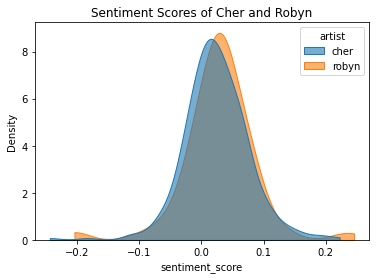

In [28]:
sns.kdeplot(data=lyrics_data, x="sentiment_score", hue="artist", cut=0, fill=True, common_norm=False, alpha= 0.6)
plt.title("Sentiment Scores of Cher and Robyn")
plt.show()

Questions
Q: Overall, which artist has the higher average sentiment per song?

A: The average sentiment score per song for artist robyn is  0.02831354492817598 and The average sentiment score per song for artist cher is  0.02409267039281054. The highest would be robyn.

Q: For your first artist, what songs have the highest and lowest sentiments? Print those songs to the screen.

A:"Baby Forgive Me" robyn_babyforgiveme.txt	has the highest sentiment of 	0.245509 and the lowest sentitment is -0.20354 Don't Fucking Tell Me What To Do 

	

Q: For your second artist, what songs have the highest and lowest sentiments? Print those songs to the screen.

A:cher highest sentiment is	0.222222 with the title My Love and lowest sentiment -0.243056 Bang-Bang

Q: Plot the distributions of the sentiment scores for both artists. You can use seaborn to plot densities or plot histograms in matplotlib.

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. 

In [29]:
positive_emojis = { "\U0001f600", "\U0001F601", 	'\U0001F60A', '\U0001F607', '\U0001F970', '\U0001F60D', '\U0001F618', '\U0001F60D', '\U0001F60B',
              '\U0001F92A', '\U0001F61D','\U0001F911', '\U0001F917','\U0001F92D','\U0001F61C','\U0001F60E',  '\U0001F49D',  '\U0001F61C', 
              '\U0001F48F', '\U0001F913', '\U0001F92A', '\U0001F619', '\U0001F64C', '\U0001F44F', '\U0001F973', '\U0001F929','\U0001F60A' }

In [30]:
negative_emojis = { '\U0001F62A', '\U0001F637', '\U0001F912', '\U0001F915', '\U0001F922', '\U0001F92E', '\U0001F927', '\U0001F975', '\U0001F615', '\U0001F61F', '\U0001F641', 
              '\U0001F641', '\U0001F62E', '\U0001F62F', '\U0001F632', '\U0001F97A', '\U0001F622', '\U0001F630', '\U0001F625', '\U0001F62D', '\U0001F616', 
              '\U0001F61E', '\U0001F613', '\U0001F624', '\U0001F621', '\U0001F92C', '\U0001F494', '\U0001F44E', '\U0001F498'}

In [37]:
positive_emo_score = 1
negative_emo_score = -1
emoji_dict = {}

for emoji in positive_emojis:
        emoji_dict[emoji] = positive_emo_score
        
for emo in negative_emojis:
        emoji_dict[emo] = negative_emo_score
        
def sentiment_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    if (len(bag_of_words)) !=0:
        return sentiment_score / (len(bag_of_words))
    else:
        return 0



def emoji_score(text):
    emoji_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in emoji_dict:
            emoji_score += emoji_dict[word]
    if (len(bag_of_words)) !=0:
        return emoji_score / (len(bag_of_words))
    else:
        return 0

In [38]:
twitter_data=twitter_data.fillna(" ")


In [39]:
twitter_data["description"]=twitter_data["description"].str.lower()
#twitter_data

In [40]:
twitter_data['sentiment_score'] = twitter_data['description'].apply(sentiment_score)
twitter_data['emoji_score'] = twitter_data['description'].apply(emoji_score)

twitter_data

,screen_name,name,id,location,followers_count,friends_count,description,artist,sentiment_score,emoji_score
0,hsmcnp,Country Girl,35152213,,1302,1014,,cher,0.000000,0.0
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,0.000000,0.0
2,anju79990584,anju,1496463006451974150,,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらdmします🧡,cher,0.000000,0.0
3,gallionjenna,J,3366479914,,752,556,csu,cher,0.000000,0.0
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,writer @washinformer @spelmancollege alumna #d...,cher,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...
358367,jakegiles,Jake Giles,19725102,LA,7690,2165,"singer of songs, type 1 diabetic, tired $jakel...",robyn,-0.062500,0.0
358368,axelbluhme,Axel Bluhme,19573759,DK,238,1565,dadx2/ con-arch/ photographer/ dk #stemgrønnes...,robyn,0.000000,0.0
358369,RayRayRay27,Rachael :),19919217,Oldham,762,1479,a year to change a life is still a year ✨😌,robyn,0.000000,0.0
358370,bhandberg,Ben Handberg,12642462,Sydney,432,593,head of consumer - mango. made in melbourne. r...,robyn,0.000000,0.0


In [41]:
twitter_data["total_score"] = twitter_data['sentiment_score'] + twitter_data['emoji_score']



In [42]:
twitter_data

,screen_name,name,id,location,followers_count,friends_count,description,artist,sentiment_score,emoji_score,total_score
0,hsmcnp,Country Girl,35152213,,1302,1014,,cher,0.000000,0.0,0.000000
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,0.000000,0.0,0.000000
2,anju79990584,anju,1496463006451974150,,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらdmします🧡,cher,0.000000,0.0,0.000000
3,gallionjenna,J,3366479914,,752,556,csu,cher,0.000000,0.0,0.000000
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,writer @washinformer @spelmancollege alumna #d...,cher,0.111111,0.0,0.111111
...,...,...,...,...,...,...,...,...,...,...,...
358367,jakegiles,Jake Giles,19725102,LA,7690,2165,"singer of songs, type 1 diabetic, tired $jakel...",robyn,-0.062500,0.0,-0.062500
358368,axelbluhme,Axel Bluhme,19573759,DK,238,1565,dadx2/ con-arch/ photographer/ dk #stemgrønnes...,robyn,0.000000,0.0,0.000000
358369,RayRayRay27,Rachael :),19919217,Oldham,762,1479,a year to change a life is still a year ✨😌,robyn,0.000000,0.0,0.000000
358370,bhandberg,Ben Handberg,12642462,Sydney,432,593,head of consumer - mango. made in melbourne. r...,robyn,0.000000,0.0,0.000000


robyn

In [43]:
total_score_robyn = sum(twitter_data["total_score"].loc[twitter_data['artist']=='robyn'])

average_score_robyn = total_score_robyn/ len(twitter_data["total_score"].loc[twitter_data['artist']=='robyn'])
print("The average sentiment score for artist robyn is " , average_score_robyn)

The average sentiment score for artist robyn is  0.024707578362315775


cher

In [44]:
total_score_cher = sum(twitter_data["total_score"].loc[twitter_data['artist']=='cher'])

average_score_cher = total_score_cher/ len(twitter_data["total_score"].loc[twitter_data['artist']=='cher'])
print("The average sentiment score for artist cher is " , average_score_cher)

The average sentiment score for artist cher is  0.0277289707773236


In [55]:
cher_storage=twitter_data.loc[twitter_data['artist']=='cher']
#
#for i in cher_storage['description']:
 #   cher_storage['tokens']=i.lower().split(" ")
  #  cher_storage
    
columns_toclean = ['description']
for columns_to_clean in cher_storage[['description']]:
            cher_storage['tokens'] = cher_storage[columns_to_clean].str.lower().str.split(" ")
cher_storage

<ipython-input-55-81d8ff527201>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cher_storage['tokens'] = cher_storage[columns_to_clean].str.lower().str.split(" ")


,screen_name,name,id,location,followers_count,friends_count,description,artist,sentiment_score,emoji_score,total_score,tokens
0,hsmcnp,Country Girl,35152213,,1302,1014,,cher,0.000000,0.0,0.000000,"[, ]"
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,0.000000,0.0,0.000000,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, &, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]"
2,anju79990584,anju,1496463006451974150,,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらdmします🧡,cher,0.000000,0.0,0.000000,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]"
3,gallionjenna,J,3366479914,,752,556,csu,cher,0.000000,0.0,0.000000,[csu]
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,writer @washinformer @spelmancollege alumna #d...,cher,0.111111,0.0,0.111111,"[writer, @washinformer, @spelmancollege, alumn..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3994798,tija15,Tija,556744001,,3,48,,cher,0.000000,0.0,0.000000,"[, ]"
3994799,Hopplosa,Beea,132963903,Strägnäs,7,165,en iq befriad brud från strängnäs,cher,0.000000,0.0,0.000000,"[en, iq, befriad, brud, från, strängnäs]"
3994800,shazza280,Sharren Dalton,556598821,,138,227,,cher,0.000000,0.0,0.000000,"[, ]"
3994801,pinchechemo1,Ivan Cruces,88285095,CDMX,258,1410,un ente más en esta sociedad!,cher,0.000000,0.0,0.000000,"[un, ente, más, en, esta, sociedad!]"


In [56]:
robyn_storage=twitter_data.loc[twitter_data['artist']=='robyn']

columns_toclean = ['description']
for columns_to_clean in robyn_storage[['description']]:
            robyn_storage['tokens'] = robyn_storage[columns_to_clean].str.lower().str.split(" ")
robyn_storage

<ipython-input-56-fb675474458f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  robyn_storage['tokens'] = robyn_storage[columns_to_clean].str.lower().str.split(" ")


,screen_name,name,id,location,followers_count,friends_count,description,artist,sentiment_score,emoji_score,total_score,tokens
0,AngelxoArts,Angelxo,1424055675030806529,"Zacatlan, Puebla, Mexico",29,535,"""i love chill"" •facebook / instagram / soundcl...",robyn,0.000000,0.0,0.000000,"[""i, love, chill"", •facebook, /, instagram, /,..."
1,songsfornikola,johnny,1502717352575651840,,6,318,"books, movies, music, nature & tv shows. og sw...",robyn,0.000000,0.0,0.000000,"[books,, movies,, music,, nature, &, tv, shows..."
2,thibaud_lola,Thibaud Lola,1502407708246478852,,3,69,(am)auteur en herbe 🌱 - juriste en paille 🤡 - ...,robyn,0.025641,0.0,0.025641,"[(am)auteur, en, herbe, 🌱, -, juriste, en, pai..."
3,KyleSew2112,Kyle S 🌹🇬🇧🇺🇦,3423966821,South East London,1258,3444,this twitter profile is full of sarcasm and ra...,robyn,0.071429,0.0,0.071429,"[this, twitter, profile, is, full, of, sarcasm..."
4,MusiFlo,MusiFlo,3324069364,Canada,470,1706,flora youssef - blogger & founder posting revi...,robyn,0.050000,0.0,0.050000,"[flora, youssef, -, blogger, &, founder, posti..."
...,...,...,...,...,...,...,...,...,...,...,...,...
358367,jakegiles,Jake Giles,19725102,LA,7690,2165,"singer of songs, type 1 diabetic, tired $jakel...",robyn,-0.062500,0.0,-0.062500,"[singer, of, songs,, type, 1, diabetic,, tired..."
358368,axelbluhme,Axel Bluhme,19573759,DK,238,1565,dadx2/ con-arch/ photographer/ dk #stemgrønnes...,robyn,0.000000,0.0,0.000000,"[dadx2/, con-arch/, photographer/, dk, #stemgr..."
358369,RayRayRay27,Rachael :),19919217,Oldham,762,1479,a year to change a life is still a year ✨😌,robyn,0.000000,0.0,0.000000,"[a, year, to, change, a, life, is, still, a, y..."
358370,bhandberg,Ben Handberg,12642462,Sydney,432,593,head of consumer - mango. made in melbourne. r...,robyn,0.000000,0.0,0.000000,"[head, of, consumer, -, mango., made, in, melb..."


In [58]:
# Cher's Twitter  Postive
cher_emojis_postive = []
for i in cher_storage['tokens']:
    for token in i:
        if token in positive_emojis:
            cher_emojis_postive.append(token)

cher_emo_count = Counter(cher_emojis_postive)
print('Top Ten Postive Emojis for Cher')
print(cher_emo_count.most_common(10))



Top Ten Postive Emojis for Cher
[('😊', 1696), ('😎', 1549), ('😍', 1469), ('🥰', 1209), ('😘', 1116), ('😁', 897), ('🤓', 793), ('😜', 662), ('😀', 559), ('🤗', 528)]


In [59]:
# Cher's Twitter  Negative

cher_emojis_neg = []
for i in cher_storage['tokens']:
    for token in i:
        if token in negative_emojis:
            cher_emojis_neg.append(token)

cher_emo_count = Counter(cher_emojis_neg)
print('Top Ten Negative Emojis for Cher')
print(cher_emo_count.most_common(10))


Top Ten Postive Emojis for Cher
[('😷', 671), ('💘', 444), ('💔', 330), ('🥺', 191), ('😭', 112), ('😡', 93), ('🤬', 85), ('🥵', 73), ('😢', 72), ('😤', 72)]


In [60]:
# Robyn Twitter Pos
robyn_emojis_postive = []
for i in robyn_storage['tokens']:
    for token in i:
        if token in positive_emojis:
            robyn_emojis_postive.append(token)

robyn_emoji_count = Counter(robyn_emojis_postive)
print('Top Ten Postive Emojis for Robyn')
print(robyn_emoji_count.most_common(10))

Top Ten Postive Emojis for Robyn
[('😎', 94), ('🤓', 77), ('😊', 72), ('🥰', 54), ('😍', 51), ('😘', 44), ('😁', 36), ('😜', 36), ('🙌', 26), ('😋', 23)]


In [62]:
# Robyn Twitter Negative
robyn_emojis_neg = []
for i in robyn_storage['tokens']:
    for token in i:
        if token in negative_emojis:
            robyn_emojis_neg .append(token)

robyn_emoji_count = Counter(robyn_emojis_neg )
print('Top Ten Negative Emojis for Robyn')
print(robyn_emoji_count.most_common(10))

Top Ten Negative Emojis for Robyn
[('😷', 21), ('💘', 19), ('💔', 14), ('🥺', 12), ('😭', 5), ('👎', 4), ('🤬', 4), ('🤮', 4), ('😮', 3), ('😡', 3)]


Q: What is the average sentiment of your two artists?

A: the average sentiment for cher is 0.0277289707773236 and robyn is 0.024707578362315775

Q: Which positive emoji is the most popular for each artist? Which negative emoji?

A: Cher most postive was 😊 with 1696  and most negative 😷671. Robyn most postive was 😎'at 94 and top negative was 😷'at 21.